#3.1

In [2]:
pip install opencv-python

In [3]:
from google.colab.patches import cv2_imshow

(<matplotlib.axes._subplots.AxesSubplot at 0x7f72e9dbfe80>,
 Text(0.5, 1.0, 'Global Thresholding'))

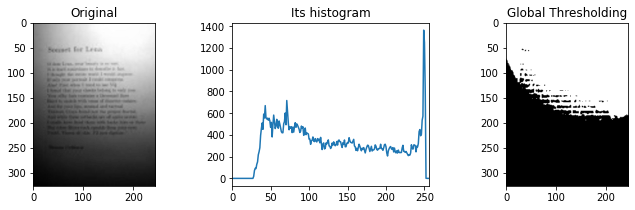

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load our image as greyscale 
image = cv2.imread('textNonUniformLight.jpg',0)

plt.figure(figsize=(12, 3))

plt.subplot(131), plt.imshow(image, 'gray'), plt.title('Original')

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.subplot(132), plt.plot(hist), plt.xlim([0, 256]) , plt.title('Its histogram')

ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(th1,'gray'), plt.title('Global Thresholding')

(<matplotlib.image.AxesImage at 0x7f70d97293c8>,
 Text(0.5, 1.0, 'Global Thresholding with th = 170'))

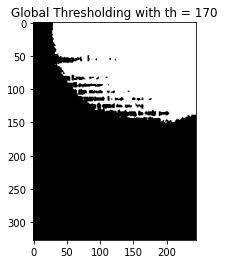

In [ ]:
ret,th1 = cv2.threshold(image,170,255,cv2.THRESH_BINARY)
plt.imshow(th1,'gray'), plt.title('Global Thresholding with th = 170')

Original


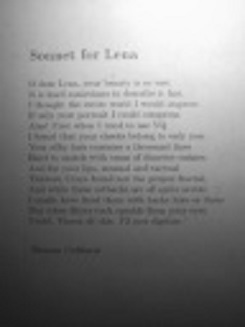

Threshold Binary


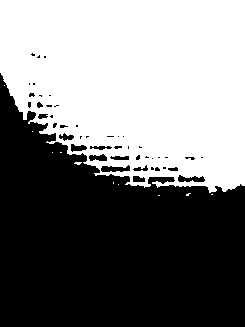

Otsu's Thresholding


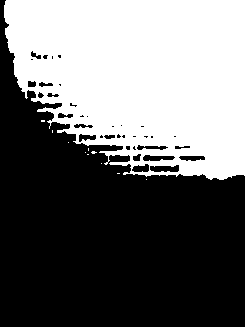

Guassian Otsu's Thresholding


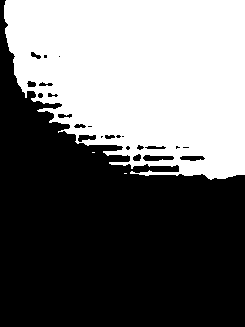

Adaptive Mean Thresholding


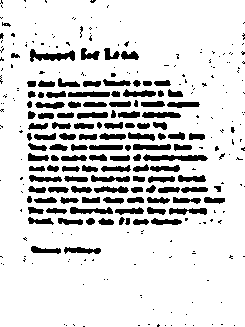

In [58]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('textNonUniformLight.jpg',0)
print('Original')
cv2_imshow(image)
cv2.waitKey(0)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
print('Threshold Binary')
cv2_imshow(thresh1)
cv2.waitKey(0)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Otsu's Thresholding")
cv2_imshow(th2)
cv2.waitKey(0) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Guassian Otsu's Thresholding")
cv2_imshow(th3)  
cv2.waitKey(0) 

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 11, 2) 
print("Adaptive Mean Thresholding")
cv2_imshow(thresh) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

ANS : Adaptive is better than that can help to adjust in each pixel to get the efficient picture

#3.2

In [10]:
pip install opencv-python

In [11]:
from google.colab.patches import cv2_imshow

(<matplotlib.axes._subplots.AxesSubplot at 0x7f72e91e3c50>,
 Text(0.5, 1.0, 'Global Thresholding'))

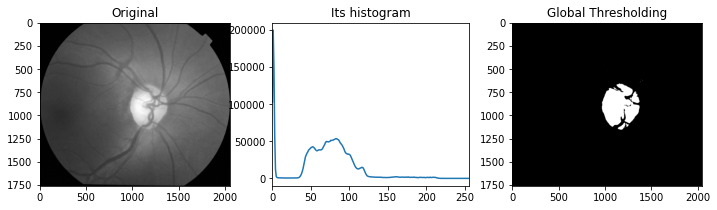

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


# Load our image as greyscale 
image = cv2.imread('drishtiGS_033.png',0)

plt.figure(figsize=(12, 3))

plt.subplot(131), plt.imshow(image, 'gray'), plt.title('Original')

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.subplot(132), plt.plot(hist), plt.xlim([0, 256]) , plt.title('Its histogram')

ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
plt.subplot(133), plt.imshow(th1,'gray'), plt.title('Global Thresholding')

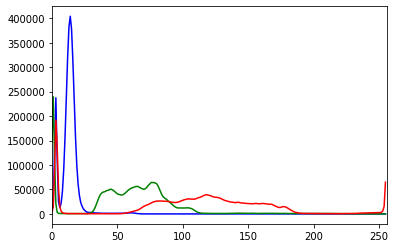

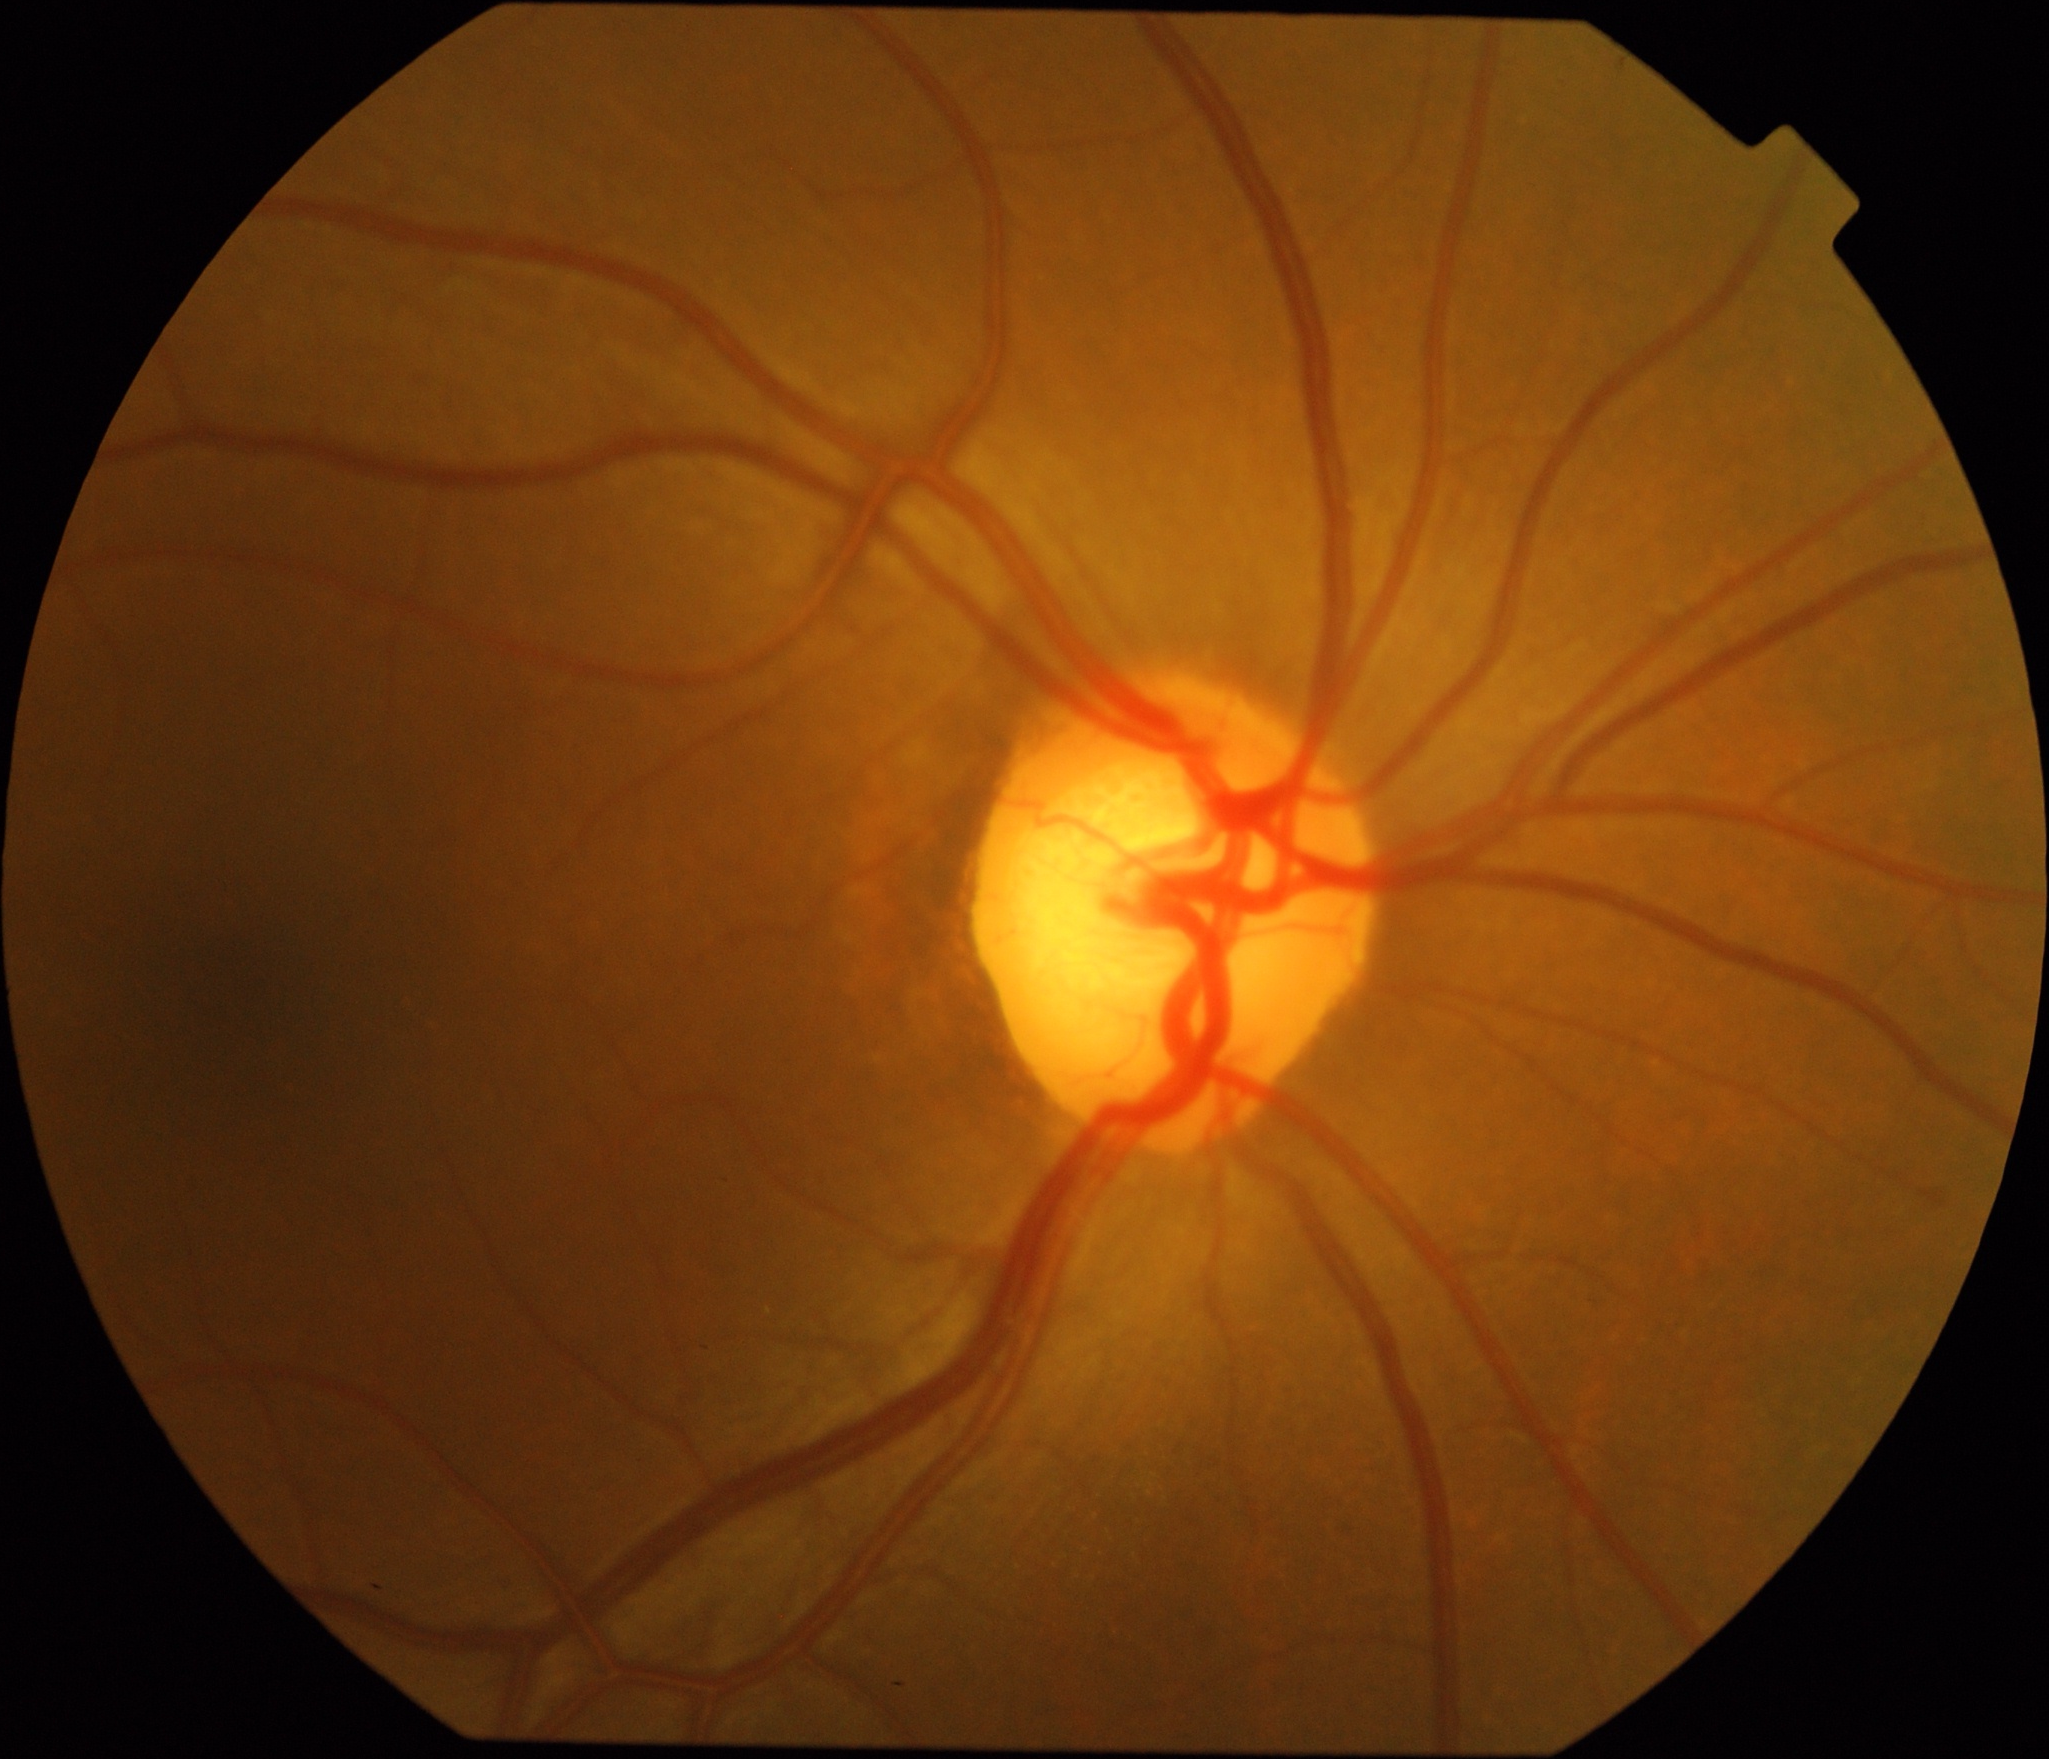

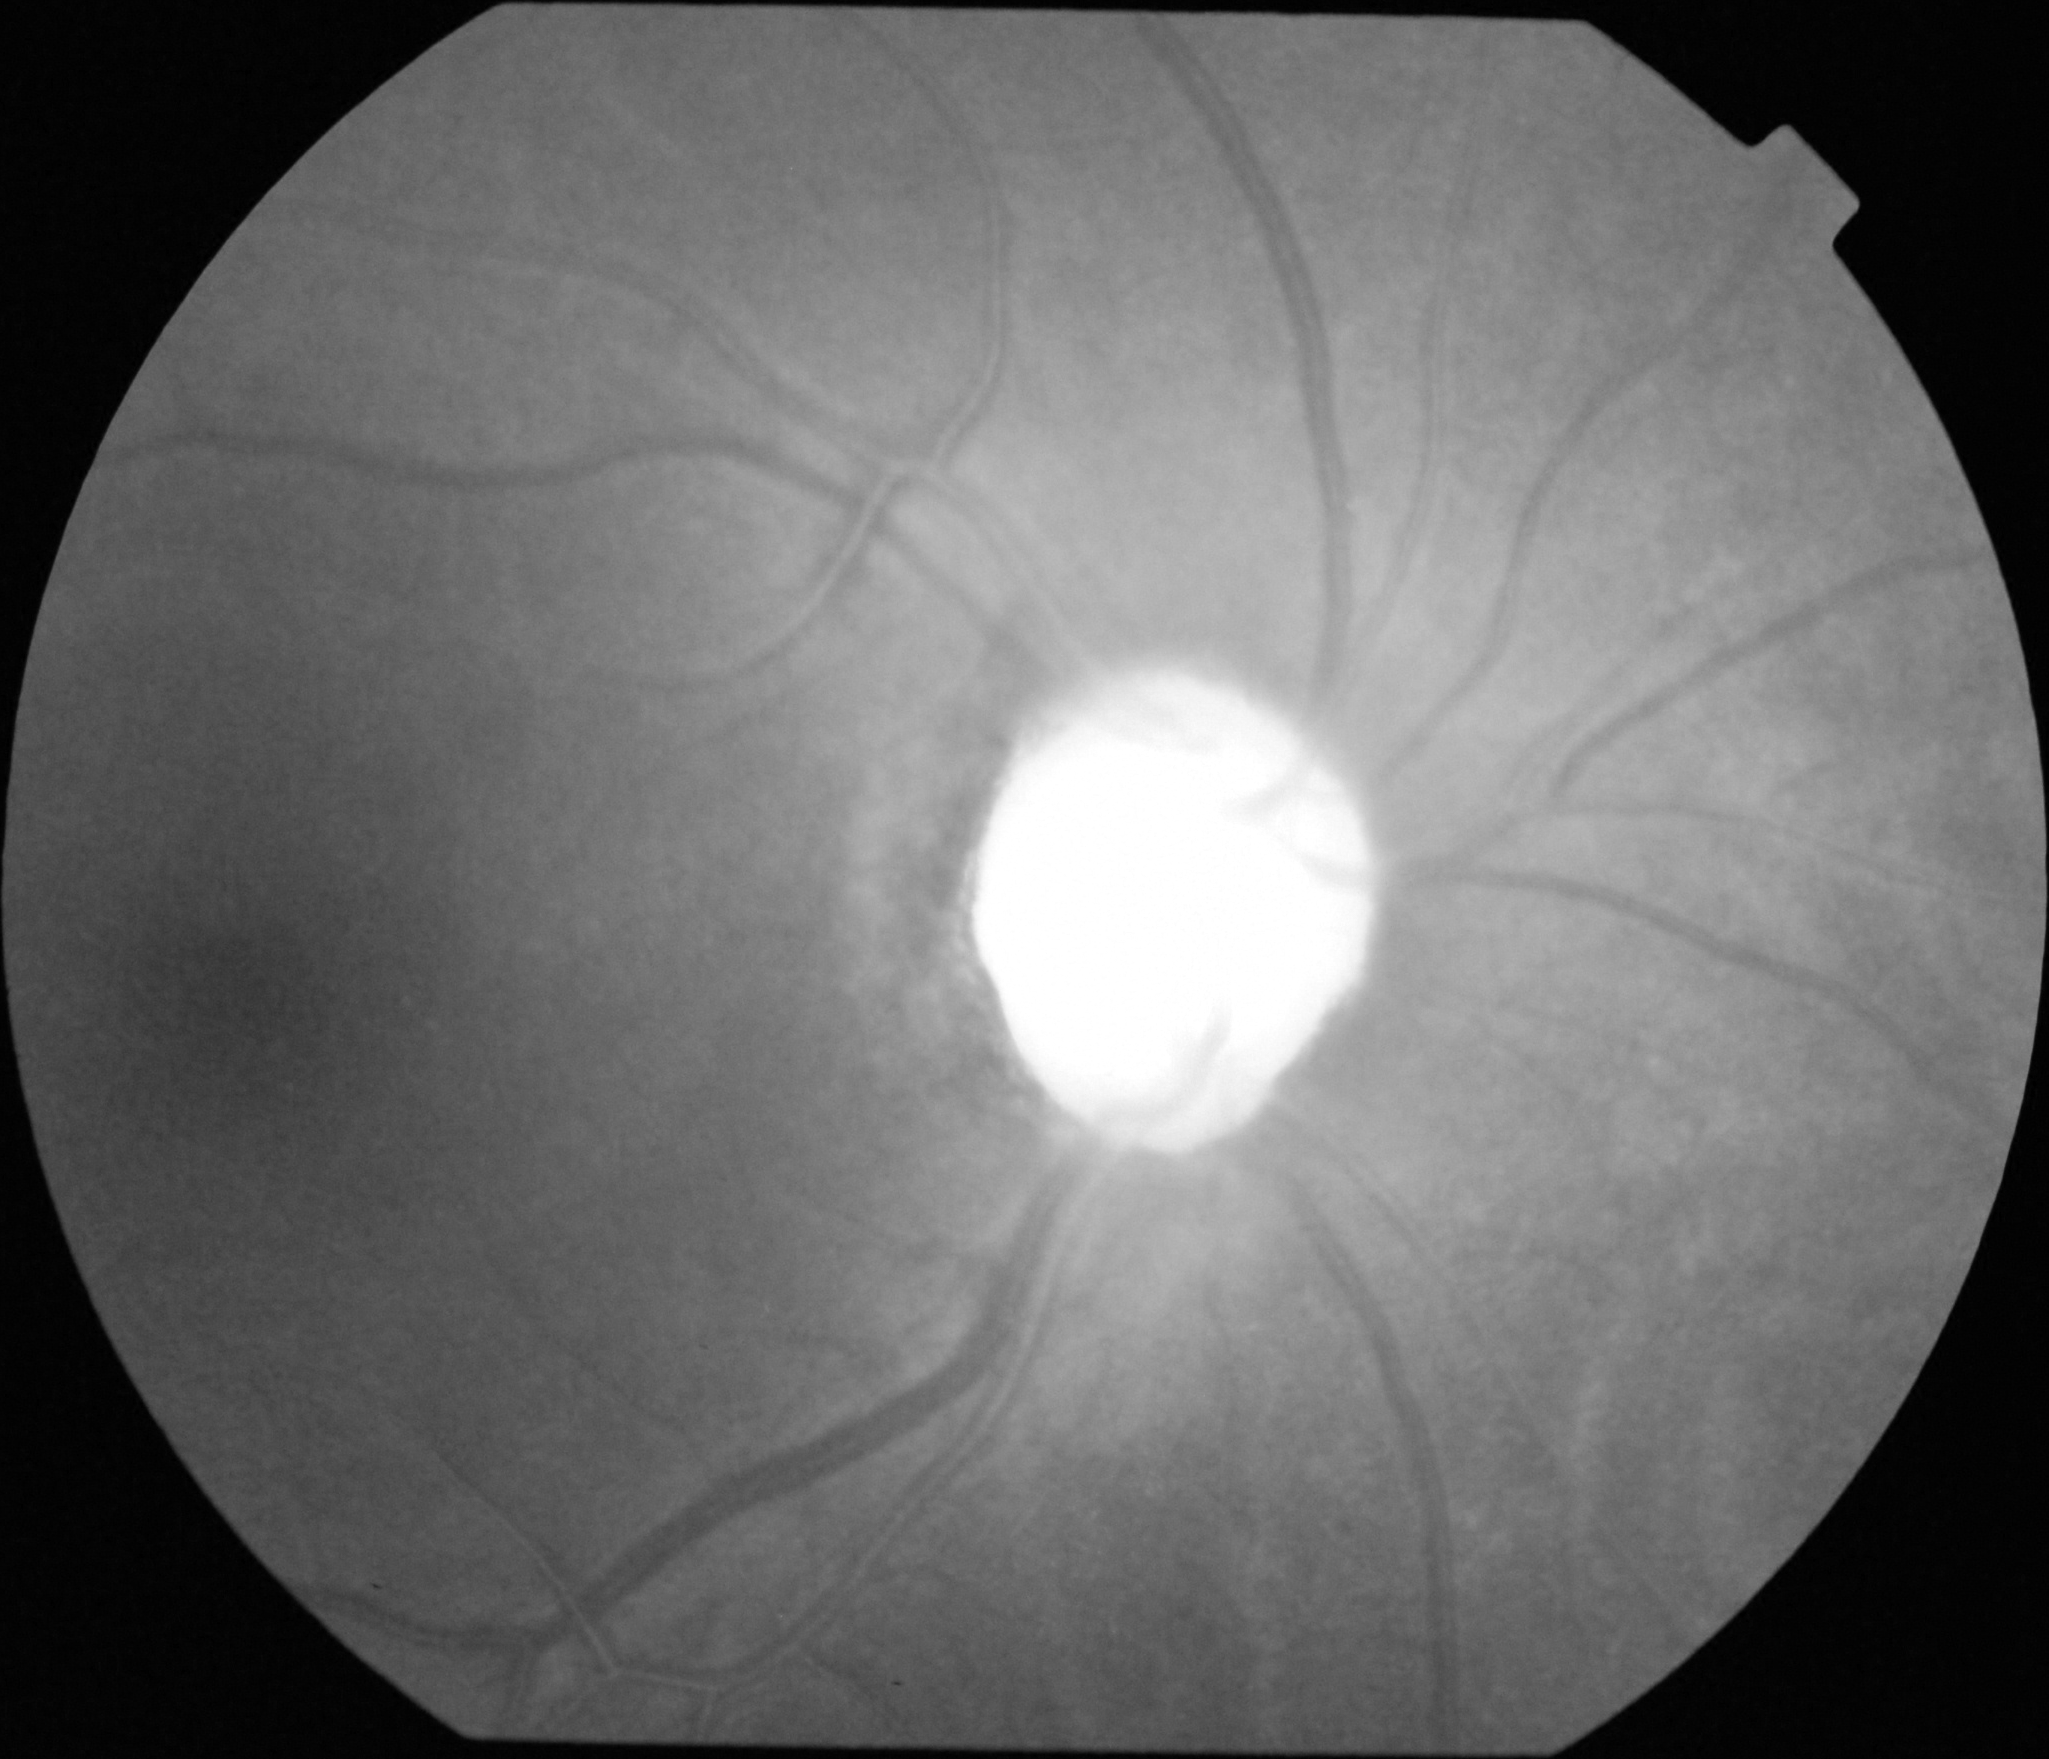

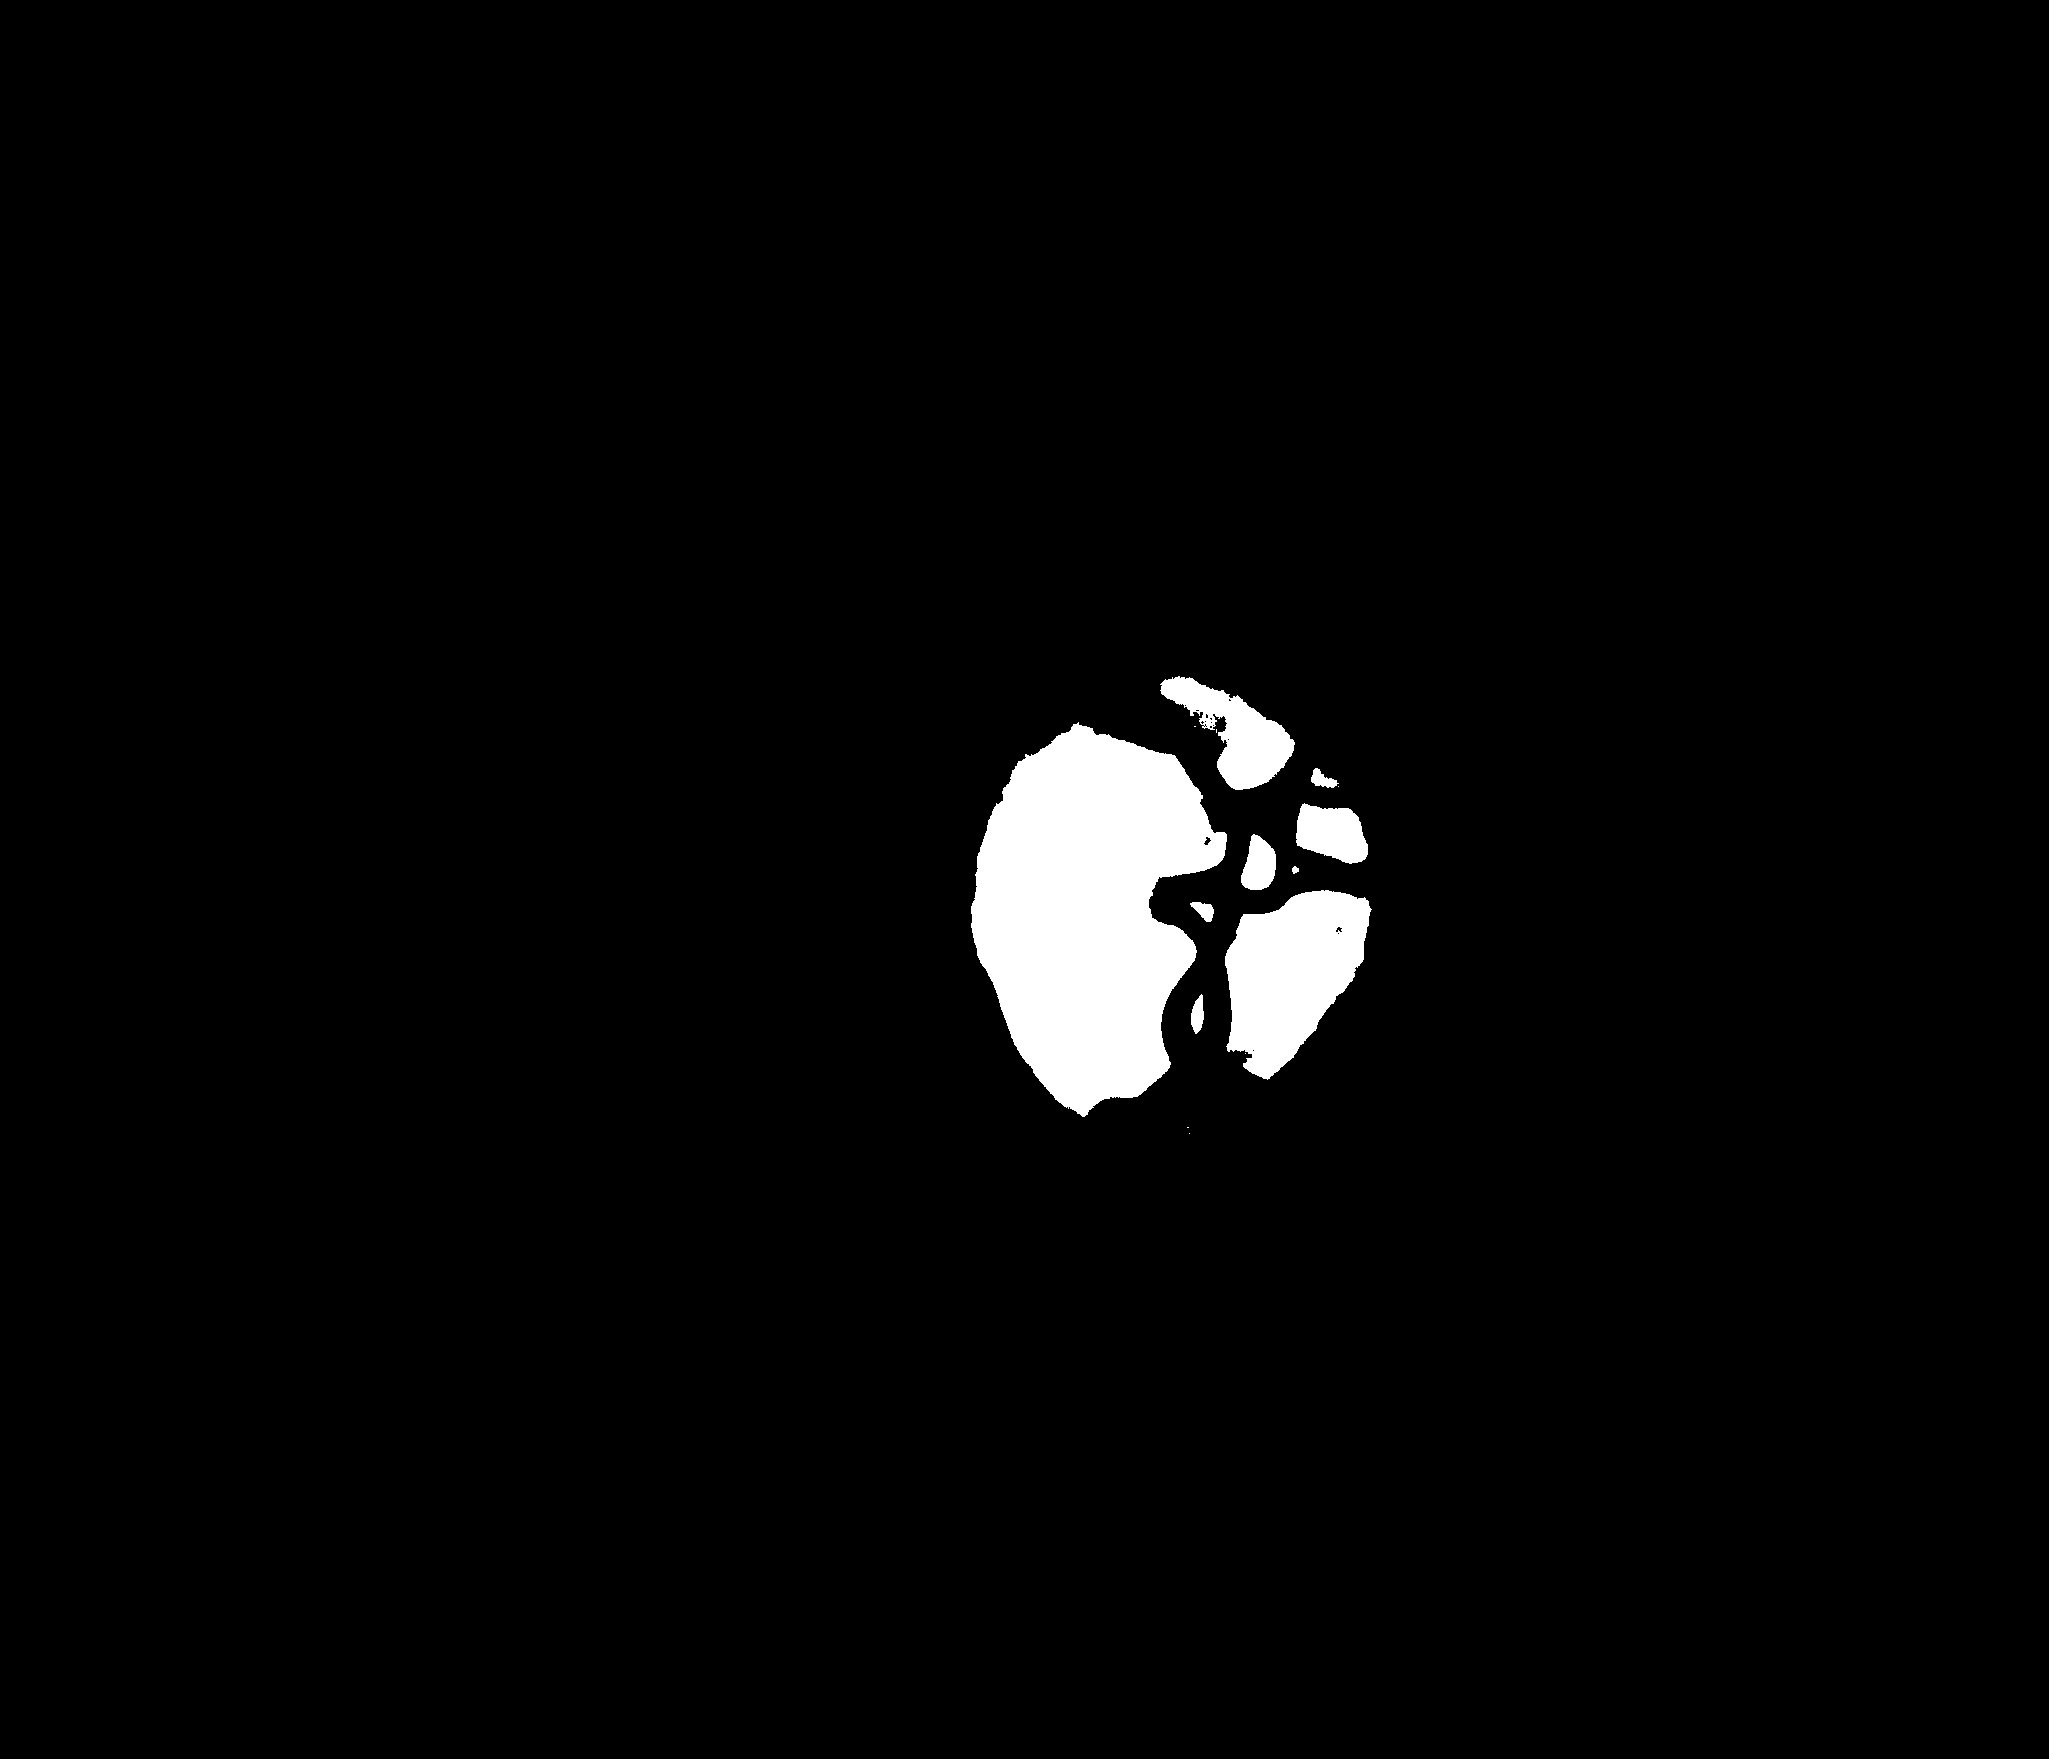

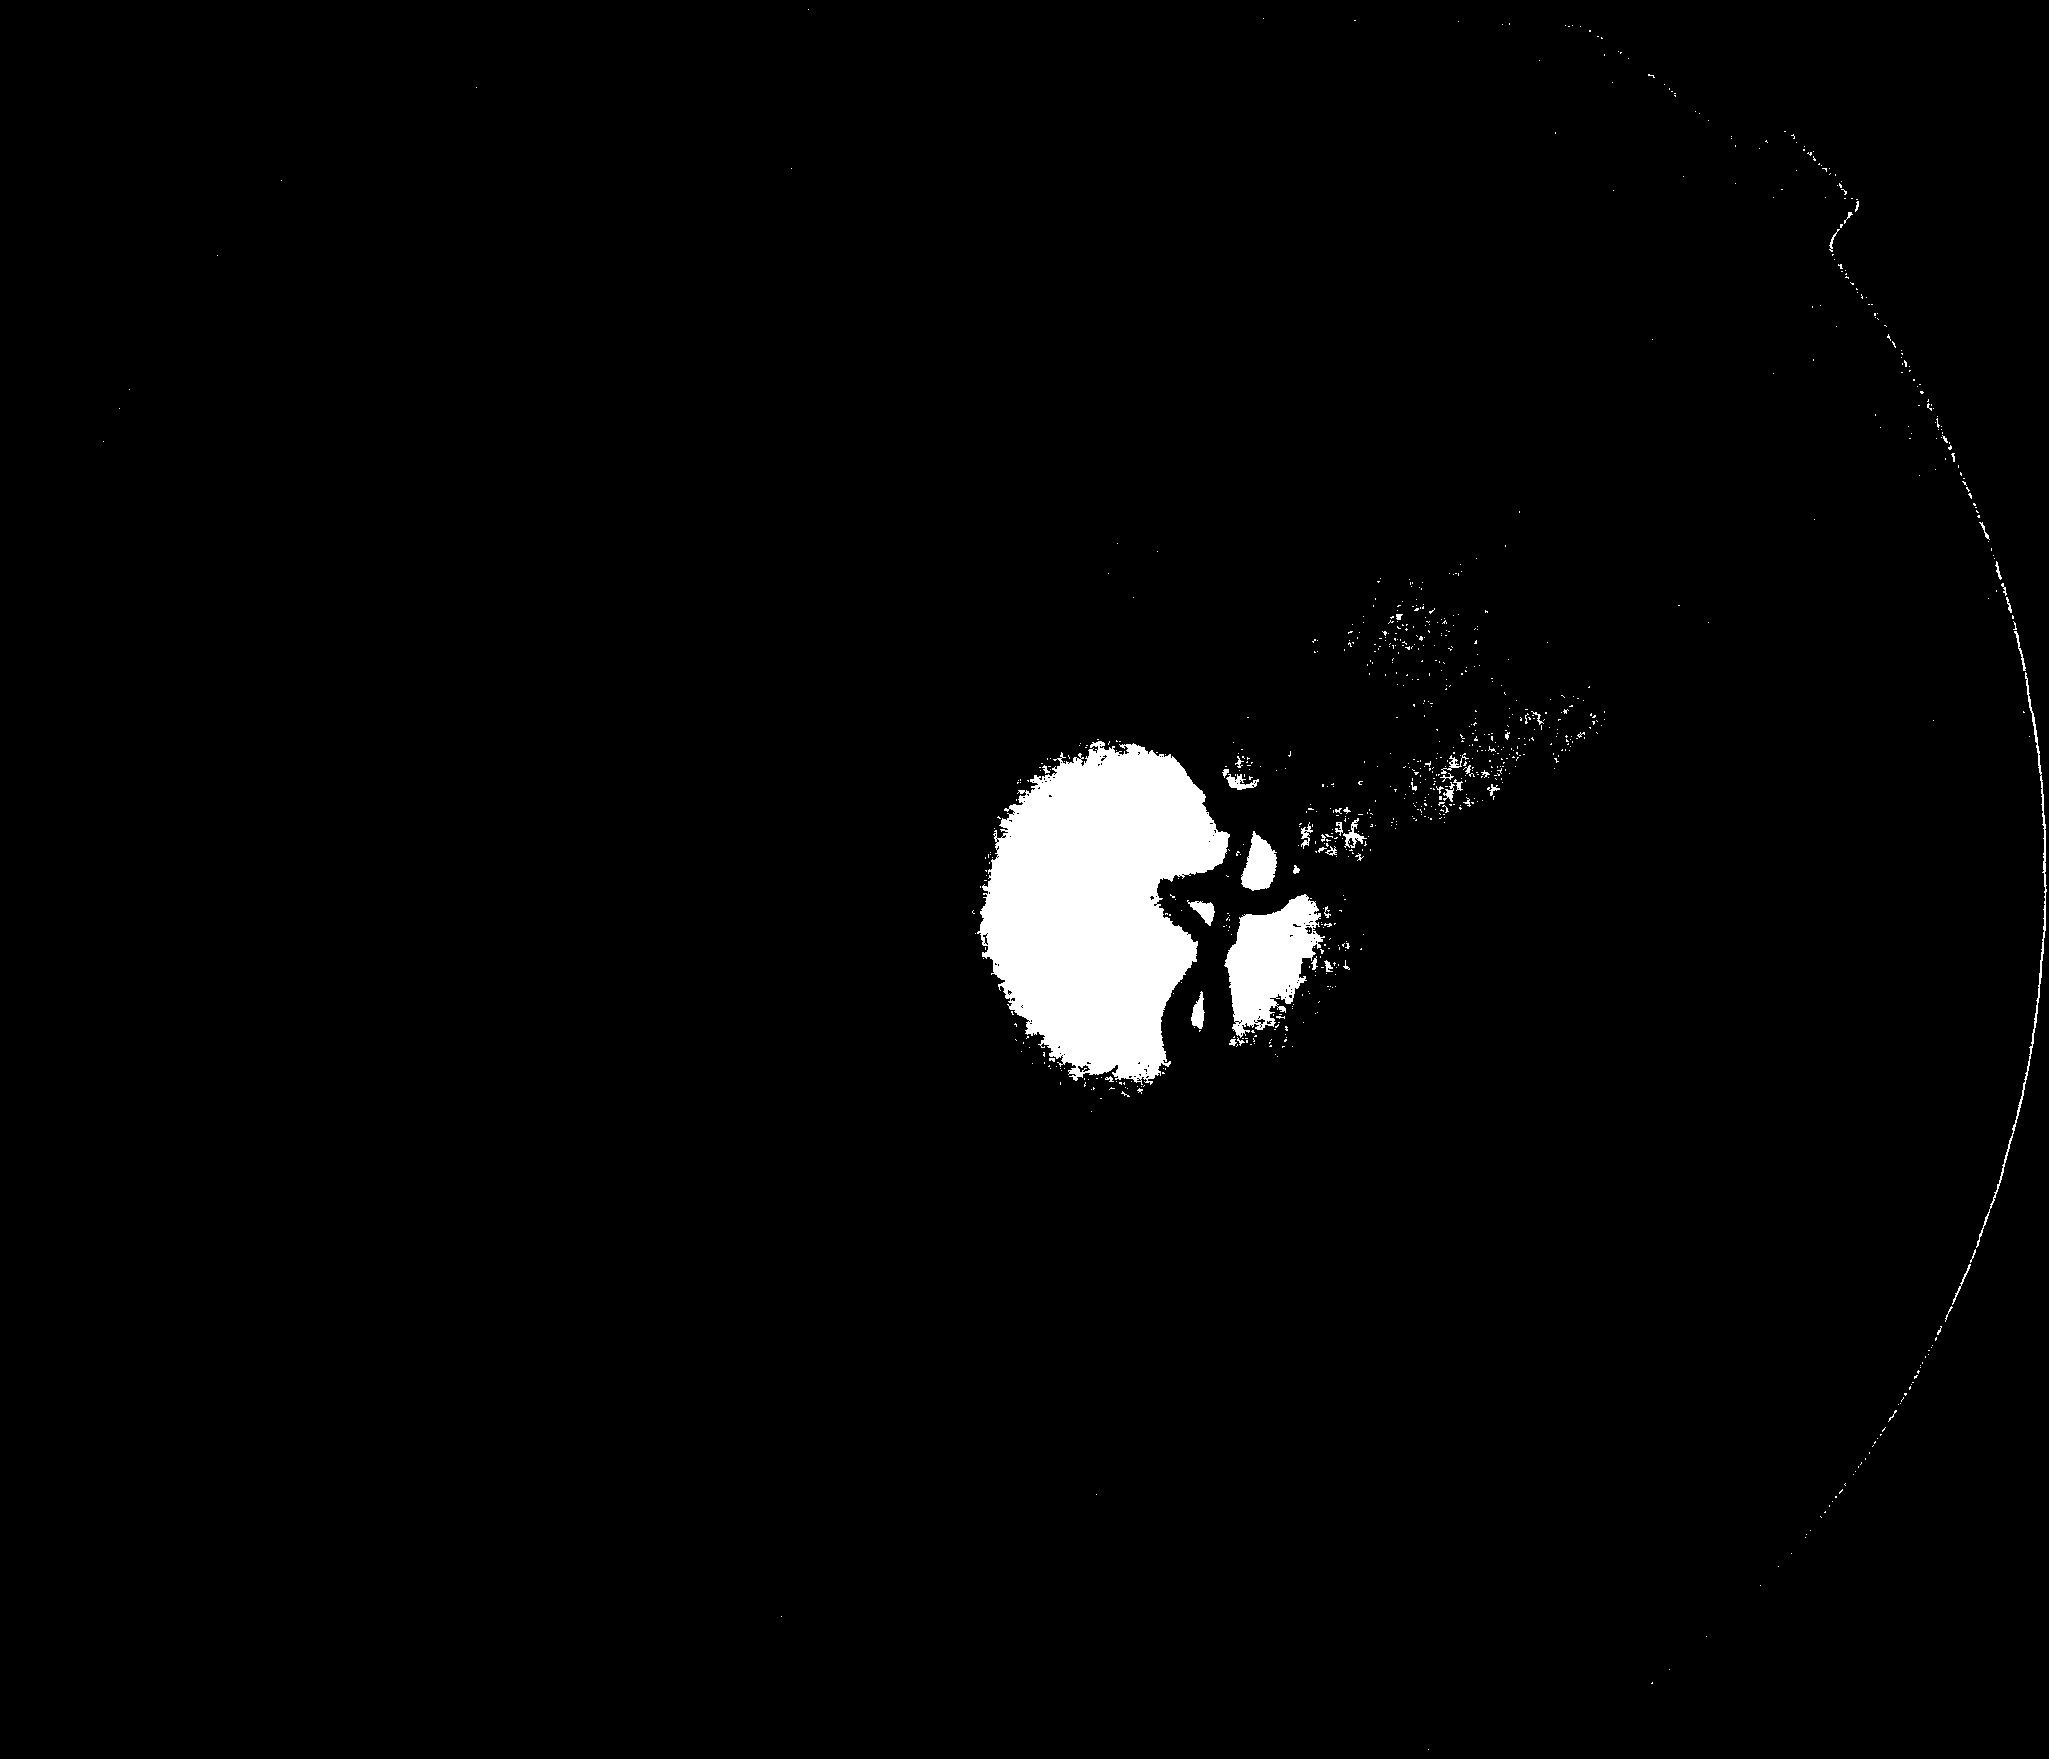

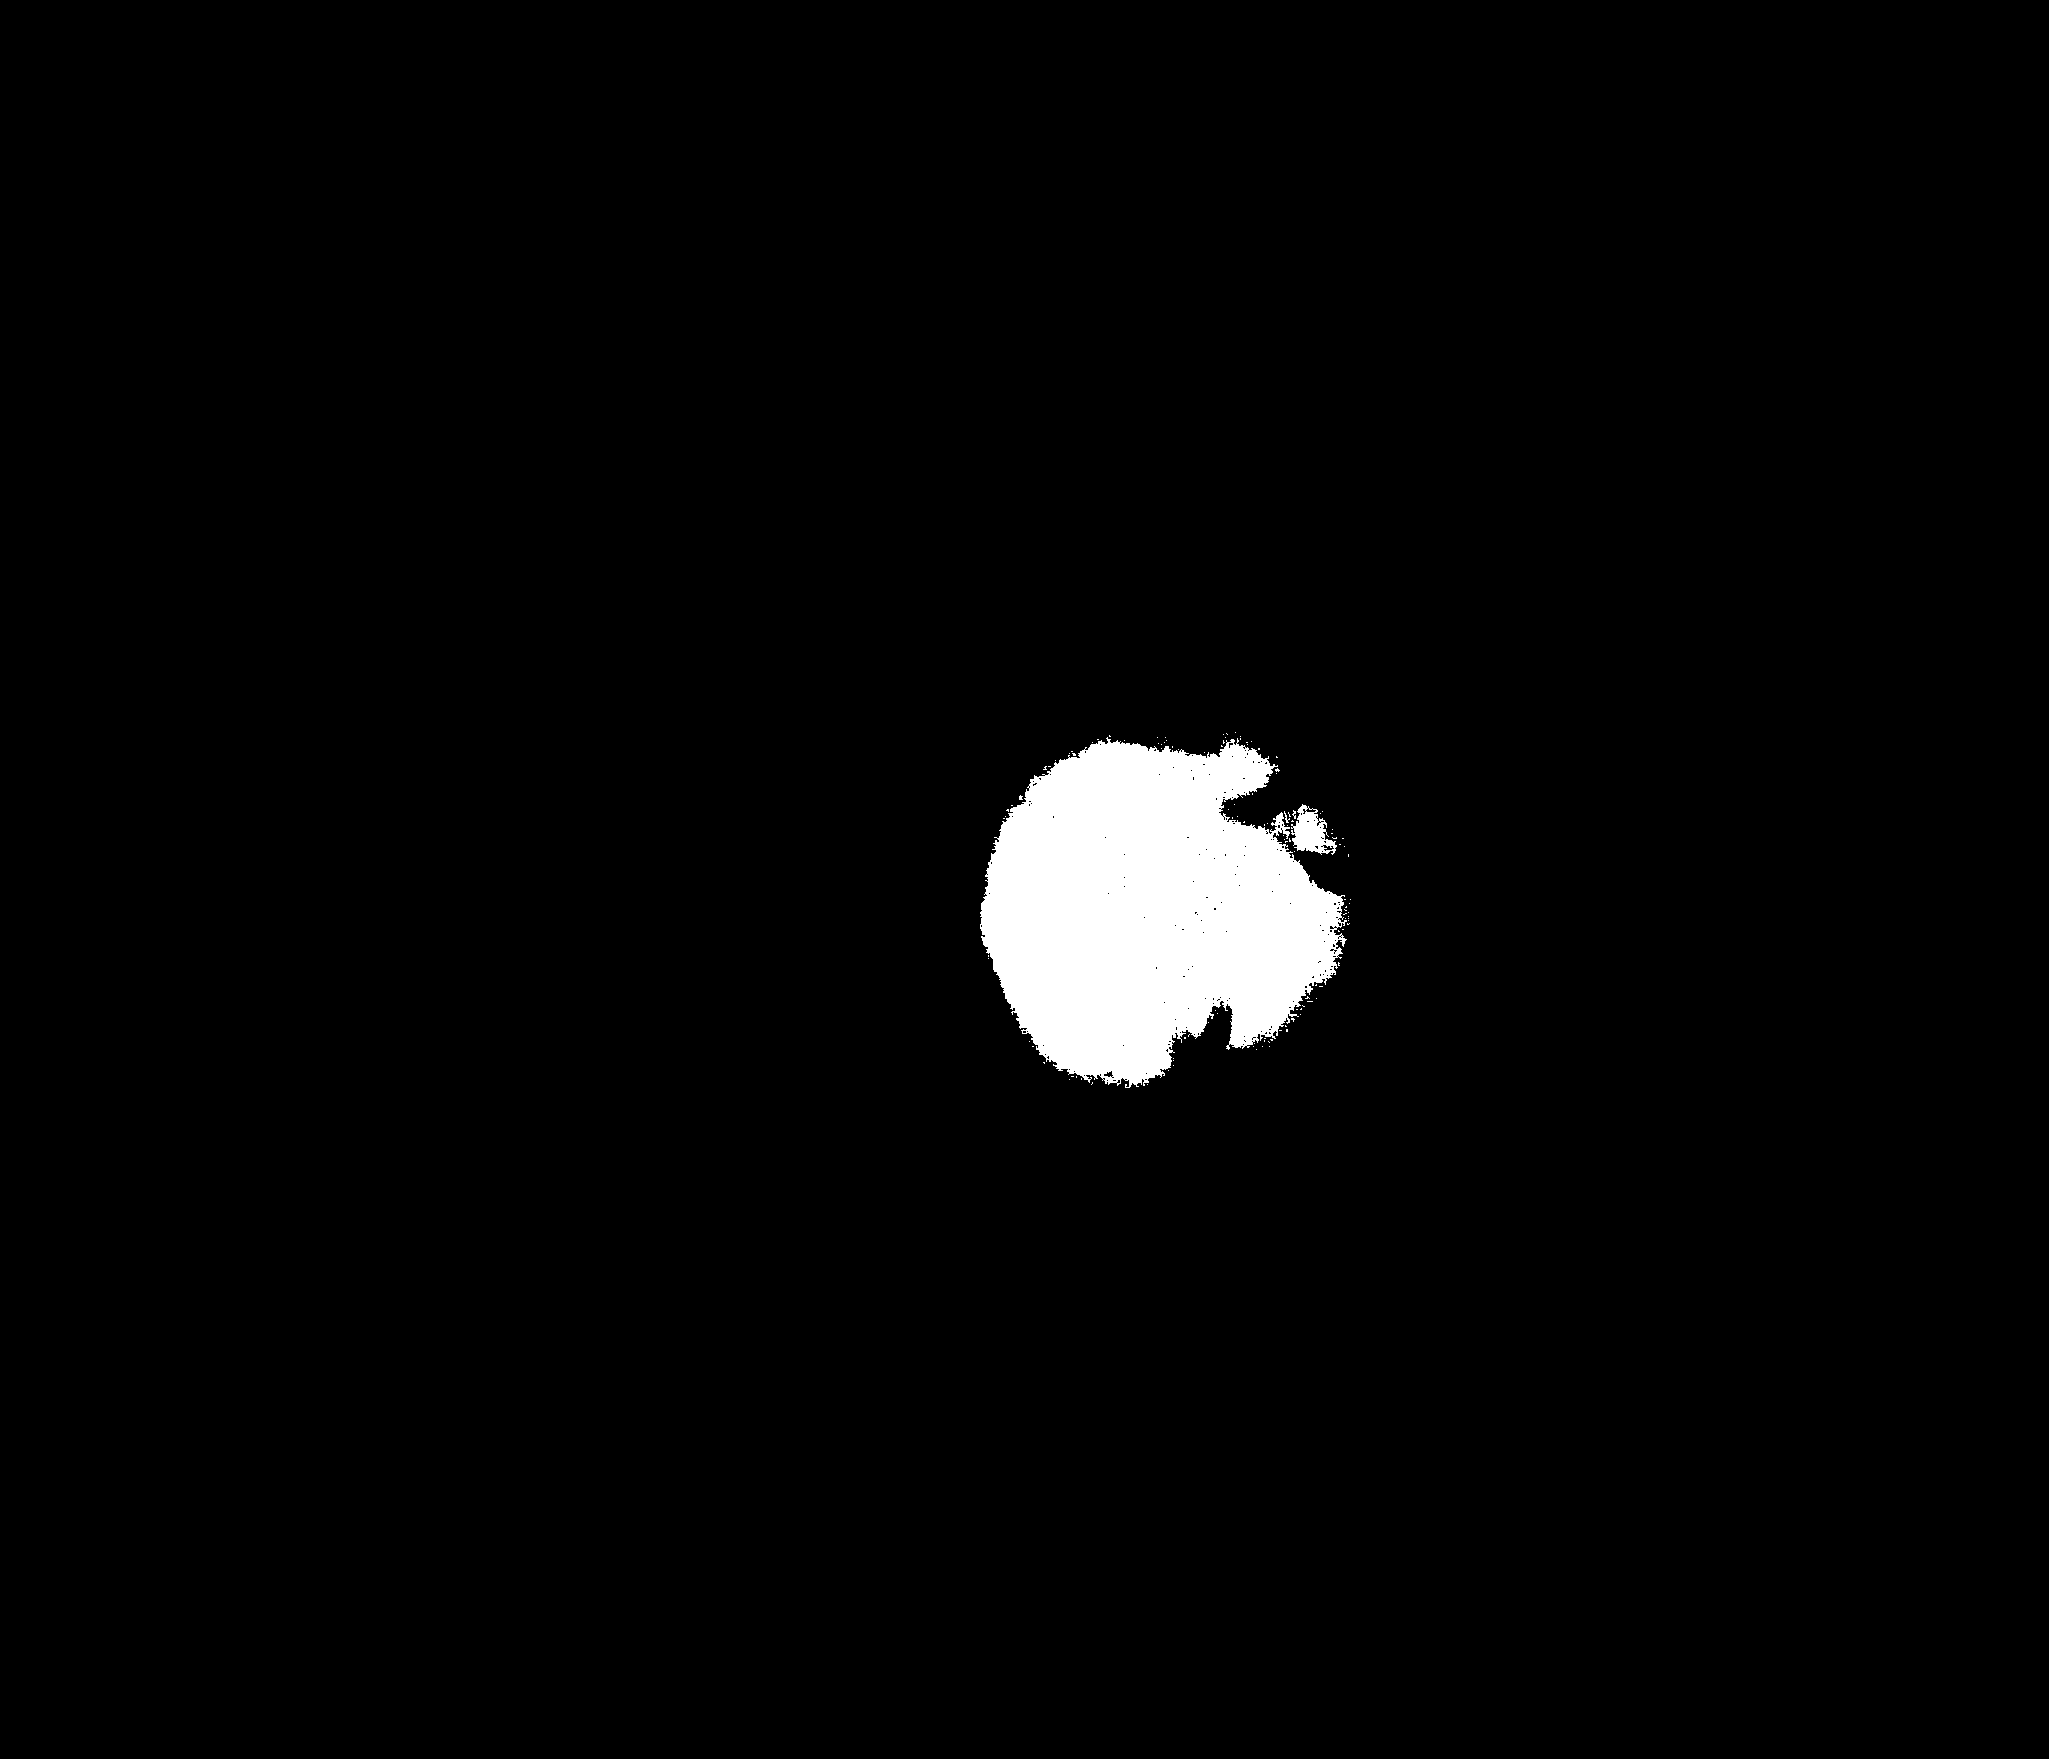

-1

<Figure size 432x288 with 0 Axes>

In [57]:
import cv2
import numpy as np

# Viewing Separate Color Channels

color = ('b','g','r')

img = cv2.imread('/content/drishtiGS_033.png')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.figure()
cv2_imshow(img)
#split
b, g, r = cv2.split(img)
cv2_imshow(r)
#perform various kind of thresholding technique

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)
cv2.waitKey(0)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(b, 25, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)
cv2.waitKey(0)
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(r, 251, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)
cv2.waitKey(0)

ANS : In plane g is the best because the green plane is obviously to see the optic.

#3.3

In [25]:
from google.colab.patches import cv2_imshow

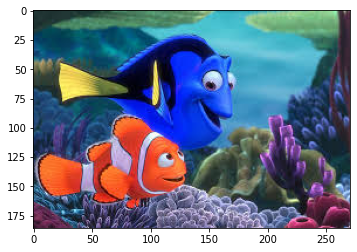

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load our image as greyscale 
#img = cv2.imread('images/download.jpg')
img = cv2.imread('nemo1.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
hsv_nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

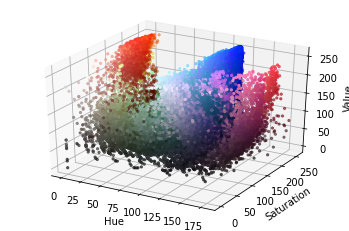

In [28]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
from matplotlib import colors


h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [29]:
lower_red = (0, 120, 100)   # HSV VALUES
upper_red = (10, 255, 255)

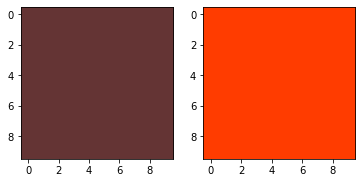

In [30]:
from matplotlib.colors import hsv_to_rgb

#lower_red = np.array([0,120,70])
#upper_red = np.array([10,255,255])

lo_square = np.full((10, 10, 3), lower_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [31]:
mask = cv2.inRange(hsv_nemo, lower_red, upper_red)

In [32]:
result = cv2.bitwise_and(img, img, mask=mask)

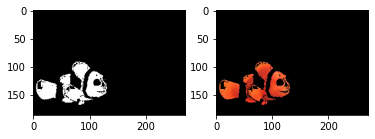

In [33]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

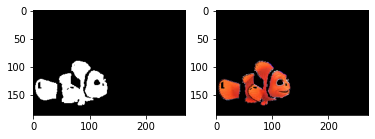

In [34]:
#Morphology 

mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))


#Segmenting the object out of the frame 
res1 = cv2.bitwise_and(img,img,mask=mask1)

plt.subplot(1, 2, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res1)
plt.show()

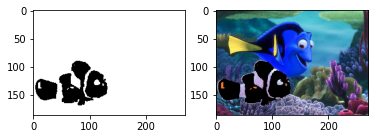

In [35]:
# creating image showing static background frame pixels only for the masked region
mask2 = cv2.bitwise_not(mask1)
res2 = cv2.bitwise_and(img, img, mask = mask2)

#Generating the final output
plt.subplot(1, 2, 1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res2)
plt.show()

In [48]:
lower_blue = (0, 30, 180)   # RGB VALUES
upper_blue = (40, 255, 255)

In [49]:
mask = cv2.inRange(hsv_nemo, lower_blue, upper_blue)

In [50]:
result = cv2.bitwise_and(img, img, mask=mask)

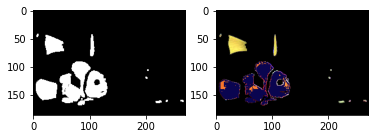

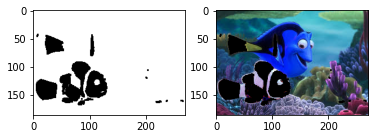

In [51]:
#Morphology 

mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))


#Segmenting the object out of the frame 
res1 = cv2.bitwise_and(img,img,mask=mask1)

plt.subplot(1, 2, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res1)
plt.show()

# creating image showing static background frame pixels only for the masked region
mask2 = cv2.bitwise_not(mask1)
res2 = cv2.bitwise_and(img, img, mask = mask2)

#Generating the final output
plt.subplot(1, 2, 1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res2)
plt.show()


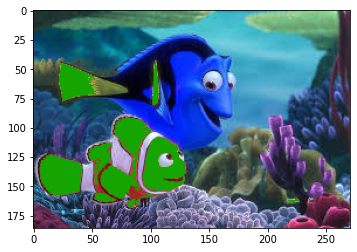

In [53]:
img[mask>0]=(20,165,0)
plt.imshow(img)

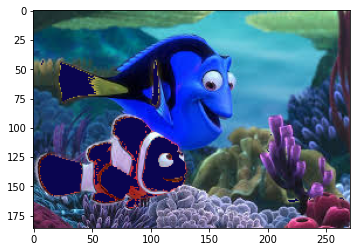

In [54]:
img[mask>0]=(10,5,80)
plt.imshow(img)

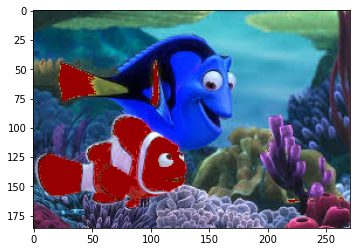

In [55]:
img[mask>0]=(150,0,0)
plt.imshow(img)

In [56]:
# K-mean Cluster to see the dominace colors

import cv2
import numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Load image and convert to a list of pixels
image = cv2.imread('nemo1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_HSV2BGR)
cv2.imshow('visualize', visualize)
cv2.waitKey()
cv2.destroyAllWindows()

[  9.36512821 198.01189744 230.94953846] 9.68%
[101.13899332  84.11852548 180.84429825] 18.87%
[106.76674873 190.98962546 213.04264111] 22.64%
[93.53400137 88.53203152 80.92137718] 23.23%
[109.6436265  197.43277799  94.46702828] 25.59%


DisabledFunctionError: ignored

ANS : From HSV the picture have the brightness and intensity not the same. But RGB causing the mixed colors to change.